***
<font color=orange size=5>导入库</font>
***

In [1]:
#基本库
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#股票数据的读取
import pandas_datareader as pdr

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#时间序列
from datetime import datetime

/Users/fengdeyu/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


***
<font color=orange size=5>获取数据</font>
***

In [2]:
start = datetime(2018,9,20)
alibaba = pdr.get_data_yahoo('BABA',start=start)
amazon = pdr.get_data_yahoo('AMZN',start=start)
alibaba.to_csv('../Data/BABA.csv')
amazon.to_csv('../Data/AMZN.csv')

In [3]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-19,163.130005,158.820007,158.820007,162.630005,23028300,162.630005
2018-09-20,167.699997,164.716003,166.889999,165.880005,22818100,165.880005
2018-09-21,169.839996,164.500000,169.460007,164.630005,22081900,164.630005
2018-09-24,163.399002,160.100006,162.809998,163.160004,13123400,163.160004
2018-09-25,165.440002,162.830002,164.050003,164.250000,9588700,164.250000


***
<font color=orange size=5>历史趋势分析</font>
***

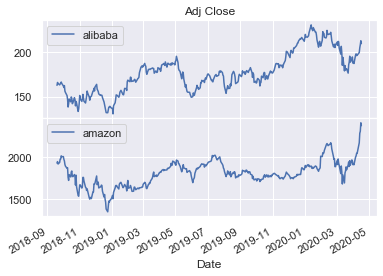

In [45]:
#股价涨跌
sns.set()
fig,ax = plt.subplots(2,1,sharex=True)
plt.subplots_adjust(wspace =0, hspace =0,)#调整子图间距
alibaba['Adj Close'].plot(ax=ax[0],label='alibaba',
                          legend=True,title='Adj Close')
amazon['Adj Close'].plot(ax=ax[1],label='amazon',legend=True)


Text(0.5, 1.0, 'Volume')

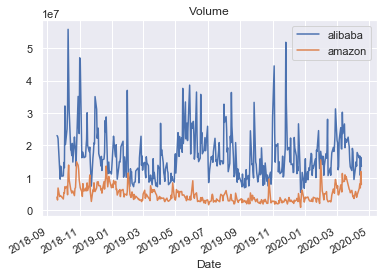

In [5]:
#每日交易次数
alibaba['Volume'].plot(label='alibaba',legend=True)
amazon['Volume'].plot(label='amazon',legend=True)
plt.title('Volume')

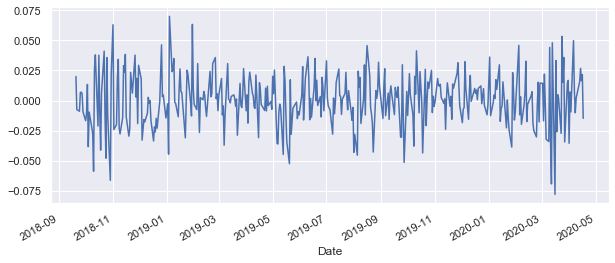

In [6]:
#日均百分比变化
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()
alibaba['daily-return'].plot(figsize=(10,4))

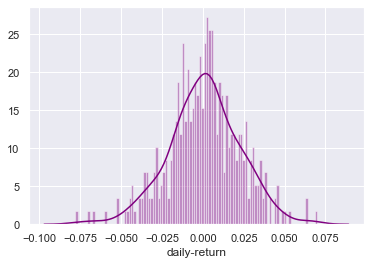

In [7]:
sns.distplot(alibaba['daily-return'].dropna(),bins=100,color='purple')